In [340]:
print("ok")

ok


In [341]:
from dotenv import load_dotenv
import os
from langchain_groq import ChatGroq
load_dotenv()

True

In [342]:
groq_api_key=os.getenv("groq_api_key")
os.environ["groq_api_key"]=groq_api_key

In [343]:
model="llama-3.1-8b-instant"
llm=ChatGroq(model=model ,api_key=groq_api_key)
res=llm.invoke("who is jefri epstein?").content
print(res)

Jeffrey Epstein (September 1, 1953 - August 10, 2019) was an American financier, philanthropist, and convicted sex offender. He was known for his high-society connections and his ability to accumulate a vast fortune through his financial services company, Jeffrey Epstein & Co.

Epstein's career as a financier began in the 1970s, but it was his relationship with Donald Trump, a young real estate developer at the time, that helped launch his career. Epstein worked for various prominent financial firms, including Bear Stearns, and eventually founded his own company in 1982.

However, Epstein's personal life was marred by allegations of sex trafficking and abuse of underage girls. In 2005, the Palm Beach Police Department received a tip about Epstein's activities, and an investigation was launched. In 2007, Epstein pleaded guilty to two state charges of soliciting a minor for prostitution and served 13 months in county jail, with the majority of his sentence spent under house arrest.

Desp

In [344]:
from langchain.tools import tool

In [345]:
## This is custom tool

In [346]:
@tool
def multiply(a:int ,b:int)->int:
    """ this is a multiply tool"""
    return a*b
@tool
def add(a:int ,b:int)->int:
    """ this is addition tool """
    return a+b
@tool
def divide(a:int ,b:int)->float:
    """this is a division tool"""
    return a/b



In [347]:
#importing inbuild tool

In [348]:
from langchain_community.tools import DuckDuckGoSearchRun

In [349]:
search=DuckDuckGoSearchRun()

In [350]:
search.invoke("what is the latest update in iphone 18?")

'1 week ago - It is the direct successor to iOS 17 and was announced alongside iPadOS 18, macOS Sequoia, watchOS 11, visionOS 2, and tvOS 18. iOS 18 is the last version of iOS that features a flat design style , as that design style was replaced with Liquid Glass in its successor, iOS 26. 3 days ago - iOS 18 was announced on June 10, ... and Pro Max. It introduced a more customizable Home Screen, adding support for placing icons anywhere and support for dark mode-compatible icons, and the ability to set a custom "tinted" color for all icons .... 2 weeks ago - Here are all the new features of ... same, just like the iPhone 17 Pro and Pro Max, the leaks suggest a new under-display area instead of the Dynamic Island .... December 19, 2025 - Accessibility features are now available for CarPlay, including Voice Control, Sound Recognition, Color Filters, and Bold Text. ... iOS 18 is a free software update that is available starting today for iPhone Xs and later. 4 days ago - The iPhone 18 Pr

In [351]:
tools=[multiply,add,divide,search]

In [352]:
llm_with_tool=llm.bind_tools(tools)

In [353]:
response=llm_with_tool.invoke("hi")

In [354]:
response.content

"I'm happy to chat with you. What would you like to talk about or what can I help you with today?"

In [355]:
response.tool_calls

[]

In [356]:
response=llm_with_tool.invoke("what is 2+2")

In [357]:
response.content

''

In [358]:
response.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 2},
  'id': '706p95p1r',
  'type': 'tool_call'}]

In [359]:
response=llm_with_tool.invoke("what is 2/2")

In [360]:
response.content

''

In [361]:
response.tool_calls

[{'name': 'divide',
  'args': {'a': 2, 'b': 2},
  'id': 'gnkd2tnjg',
  'type': 'tool_call'}]

In [362]:
response=llm_with_tool.invoke("what is the current age of TATA group")

In [363]:
response.tool_calls

[{'name': 'duckduckgo_search',
  'args': {'query': 'TATA group current age'},
  'id': 'gj9jnaxzc',
  'type': 'tool_call'}]

In [364]:
from langchain_core.messages import HumanMessage,SystemMessage
from langgraph.graph import MessagesState,StateGraph,END,START
from langgraph.prebuilt import ToolNode

In [365]:
SYSTEM_PROMPT="You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs."



In [366]:
user_query=["tell me what is 2+2"]

In [367]:
[SYSTEM_PROMPT]+user_query

['You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs.',
 'tell me what is 2+2']

In [368]:
def function_1(state : MessagesState):
      
    user_question=state["messages"]
    
    input_question = [SYSTEM_PROMPT]+user_question
    
    response = llm_with_tool.invoke(input_question)
    
    return {
        "messages":[response]
    }

In [369]:
builder=StateGraph(MessagesState)

In [370]:
builder.add_node("llm_decision_step",function_1)

In [371]:
builder.add_node("tools",ToolNode(tools))

In [372]:
builder.add_edge(START, "llm_decision_step")

In [373]:
from langgraph.prebuilt import tools_condition

In [374]:
builder.add_conditional_edges("llm_decision_step",tools_condition)

In [375]:
builder.add_edge("tools","llm_decision_step")

In [376]:
react_graph=builder.compile()

In [377]:
message=[HumanMessage(content="What is 2 times of narendramodi's age?")]

In [378]:
react_graph.invoke({"messages":message})

{'messages': [HumanMessage(content="What is 2 times of narendramodi's age?", additional_kwargs={}, response_metadata={}, id='27d39580-1556-46b1-9150-b4d7ae3a12c9'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'a666arq90', 'function': {'arguments': '{"query":"narendramodi age"}', 'name': 'duckduckgo_search'}, 'type': 'function'}, {'id': '836jchj8y', 'function': {'arguments': '{"a":2,"b":69}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 39, 'prompt_tokens': 465, 'total_tokens': 504, 'completion_time': 0.054317014, 'completion_tokens_details': None, 'prompt_time': 0.029485344, 'prompt_tokens_details': None, 'queue_time': 0.046217906, 'total_time': 0.083802358}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c394c-2b9c-7fd1-a2ba-e2336ebeb9d6-0', tool_calls=[{'name': 

In [379]:
message = [HumanMessage(content="How much is the net worth of Elon Musk, and divide it by 2?")]

In [380]:
react_graph.invoke({"messages":message})

{'messages': [HumanMessage(content='How much is the net worth of Elon Musk, and divide it by 2?', additional_kwargs={}, response_metadata={}, id='8f339907-5912-4b7f-bf96-e1b044c994f8'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'ahn6ey9wc', 'function': {'arguments': '{"query":"Elon Musk net worth"}', 'name': 'duckduckgo_search'}, 'type': 'function'}, {'id': '1k2ky0s5h', 'function': {'arguments': '{"a":2000000000,"b":2}', 'name': 'divide'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 469, 'total_tokens': 511, 'completion_time': 0.057111254, 'completion_tokens_details': None, 'prompt_time': 0.027919347, 'prompt_tokens_details': None, 'queue_time': 0.045591333, 'total_time': 0.085030601}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c394c-32e1-71b1-9808-f3452318

In [381]:
message = [HumanMessage(content="What is the speed of light in m/s and multiply it by 10?")]


In [382]:
react_graph.invoke({"messages":message})

{'messages': [HumanMessage(content='What is the speed of light in m/s and multiply it by 10?', additional_kwargs={}, response_metadata={}, id='620558cd-a73d-478b-a88a-ac4469618f9a'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '5qnqk2ahk', 'function': {'arguments': '{"a":299792458,"b":100}', 'name': 'divide'}, 'type': 'function'}, {'id': 'ybr052ffk', 'function': {'arguments': '{"a":299792458,"b":10}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 41, 'prompt_tokens': 468, 'total_tokens': 509, 'completion_time': 0.072818182, 'completion_tokens_details': None, 'prompt_time': 0.03544925, 'prompt_tokens_details': None, 'queue_time': 0.047457336, 'total_time': 0.108267432}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c394c-3b37-7b13-a183-391bd7c57101-0', tool_calls=[

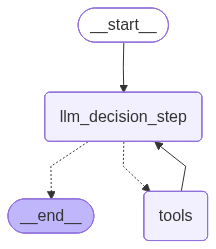

In [383]:
from IPython.display import Image, display
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [385]:
response=react_graph.invoke({"messages":message})

In [386]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is the speed of light in m/s and multiply it by 10?
================================== Ai Message ==================================
Tool Calls:
  divide (3s9f40jns)
 Call ID: 3s9f40jns
  Args:
    a: 299792458
    b: 1
  multiply (jctja8am3)
 Call ID: jctja8am3
  Args:
    a: 299792458
    b: 10
================================= Tool Message =================================
Name: divide

299792458.0
================================= Tool Message =================================
Name: multiply

2997924580
================================== Ai Message ==================================

The speed of light in m/s is approximately 299,792,458 m/s. Multiplying it by 10 gives us 2,997,924,580 m/s.


In [387]:
import yfinance as yf

In [388]:
@tool
def get_stock_price(ticker:str)->str:
    """
    Fetches the previous closing price of a given stock ticker from Yahoo Finance.

    Args:
        ticker (str): The stock ticker symbol (e.g., 'AAPL', 'TSLA', 'NIFTY.BO').

    Returns:
        str: A message with the stock's previous closing price.
    """
    try:
        stock = yf.Ticker(ticker)
        price = stock.info.get('previousClose')
        if price is None:
            return f"Could not fetch price for ticker '{ticker}'."
        return f"The last closing price of {ticker.upper()} was ${price:.2f}."
    except Exception as e:
        return f"An error occurred while fetching stock data: {str(e)}"
     
    

In [389]:
get_stock_price.invoke("AAPL")


'The last closing price of AAPL was $275.91.'

In [390]:
get_stock_price.invoke("TSLA")

'The last closing price of TSLA was $397.21.'

In [391]:
tools

[StructuredTool(name='multiply', description='this is a multiply tool', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x14407c820>),
 StructuredTool(name='add', description='this is addition tool', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x14407e560>),
 StructuredTool(name='divide', description='this is a division tool', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x14407e830>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', max_results=5, backend='auto', source='text'))]

In [392]:
tools = [add, multiply, divide, search,get_stock_price]

In [393]:
llm_with_tools=llm.bind_tools(tools)

In [394]:
response=llm_with_tools.invoke("can you give me a latest stock price of adani greens?")

In [395]:
response.content

''

In [396]:
response.tool_calls

[{'name': 'get_stock_price',
  'args': {'ticker': 'ADANIGREEN.NS'},
  'id': 'be2124tvb',
  'type': 'tool_call'}]

In [397]:
SYSTEM_PROMPT = SystemMessage(
    content="You are a helpful assistant tasked with using search, the yahoo finance tool and performing arithmetic on a set of inputs."
)
def function_1(state:MessagesState):
    
    user_question=state["messages"]
    
    input_question = [SYSTEM_PROMPT]+user_question
    
    response = llm_with_tools.invoke(input_question)
    
    return {
        "messages":[response]
    }

In [398]:
workflow = StateGraph(MessagesState)
workflow.add_node("llm_decision_step", function_1)
workflow.add_node("tools", ToolNode(tools))
workflow.add_edge(START, "llm_decision_step")
workflow.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)
workflow.add_edge("tools", "llm_decision_step")
react_graph2 = workflow.compile()

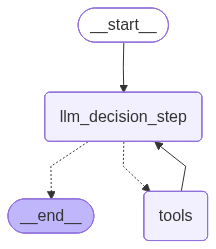

In [399]:
display(Image(react_graph2.get_graph(xray=True).draw_mermaid_png()))

In [409]:
messages = [HumanMessage(content="add 1000 in the current stock price of Apple.")]



messages = react_graph2.invoke({"messages": messages})

BadRequestError: Error code: 400 - {'error': {'message': 'tool call validation failed: parameters for tool add did not match schema: errors: [`/a`: expected integer, but got number]', 'type': 'invalid_request_error', 'code': 'tool_use_failed', 'failed_generation': '<function=add>{"a": 275.91, "b": 1000}</function>'}}

In [ ]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

add 1000 in the current stock price of Apple.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (x1w0sw2ac)
 Call ID: x1w0sw2ac
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $275.91.
================================== Ai Message ==================================
Tool Calls:
  add (cf4bkvpfq)
 Call ID: cf4bkvpfq
  Args:
    a: 1000
    b: 275
================================= Tool Message =================================
Name: add

1275
================================== Ai Message ==================================

So, adding $1000 to the current stock price of Apple would result in $1275.


In [410]:
messages = [HumanMessage(content="can you give me stock price of Apple with the latest news of the Apple.")]
messages = react_graph2.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

can you give me stock price of Apple with the latest news of the Apple.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (02fv228mv)
 Call ID: 02fv228mv
  Args:
    ticker: AAPL
  duckduckgo_search (2sfpbrzdn)
 Call ID: 2sfpbrzdn
  Args:
    query: Apple latest news
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $275.91.
================================= Tool Message =================================
Name: duckduckgo_search

The official source for news about Apple , from Apple . Read press releases, get updates, watch video and download images. Read full articles, watch videos, browse thousands of titles and more on the " Apple " topic with Google News . Welcome to 9to5Mac’s top stories of the week, where we recap the biggest news in the Apple world eve